In [1]:
import pandas as pd
import sqlite3 as sql

In [2]:
database = "chinook.db"
conn = sql.connect(database)

In [8]:
pd.read_sql_query("select * from sqlite_master",conn)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [12]:
def query(q):
    return pd.read_sql_query(q,conn)

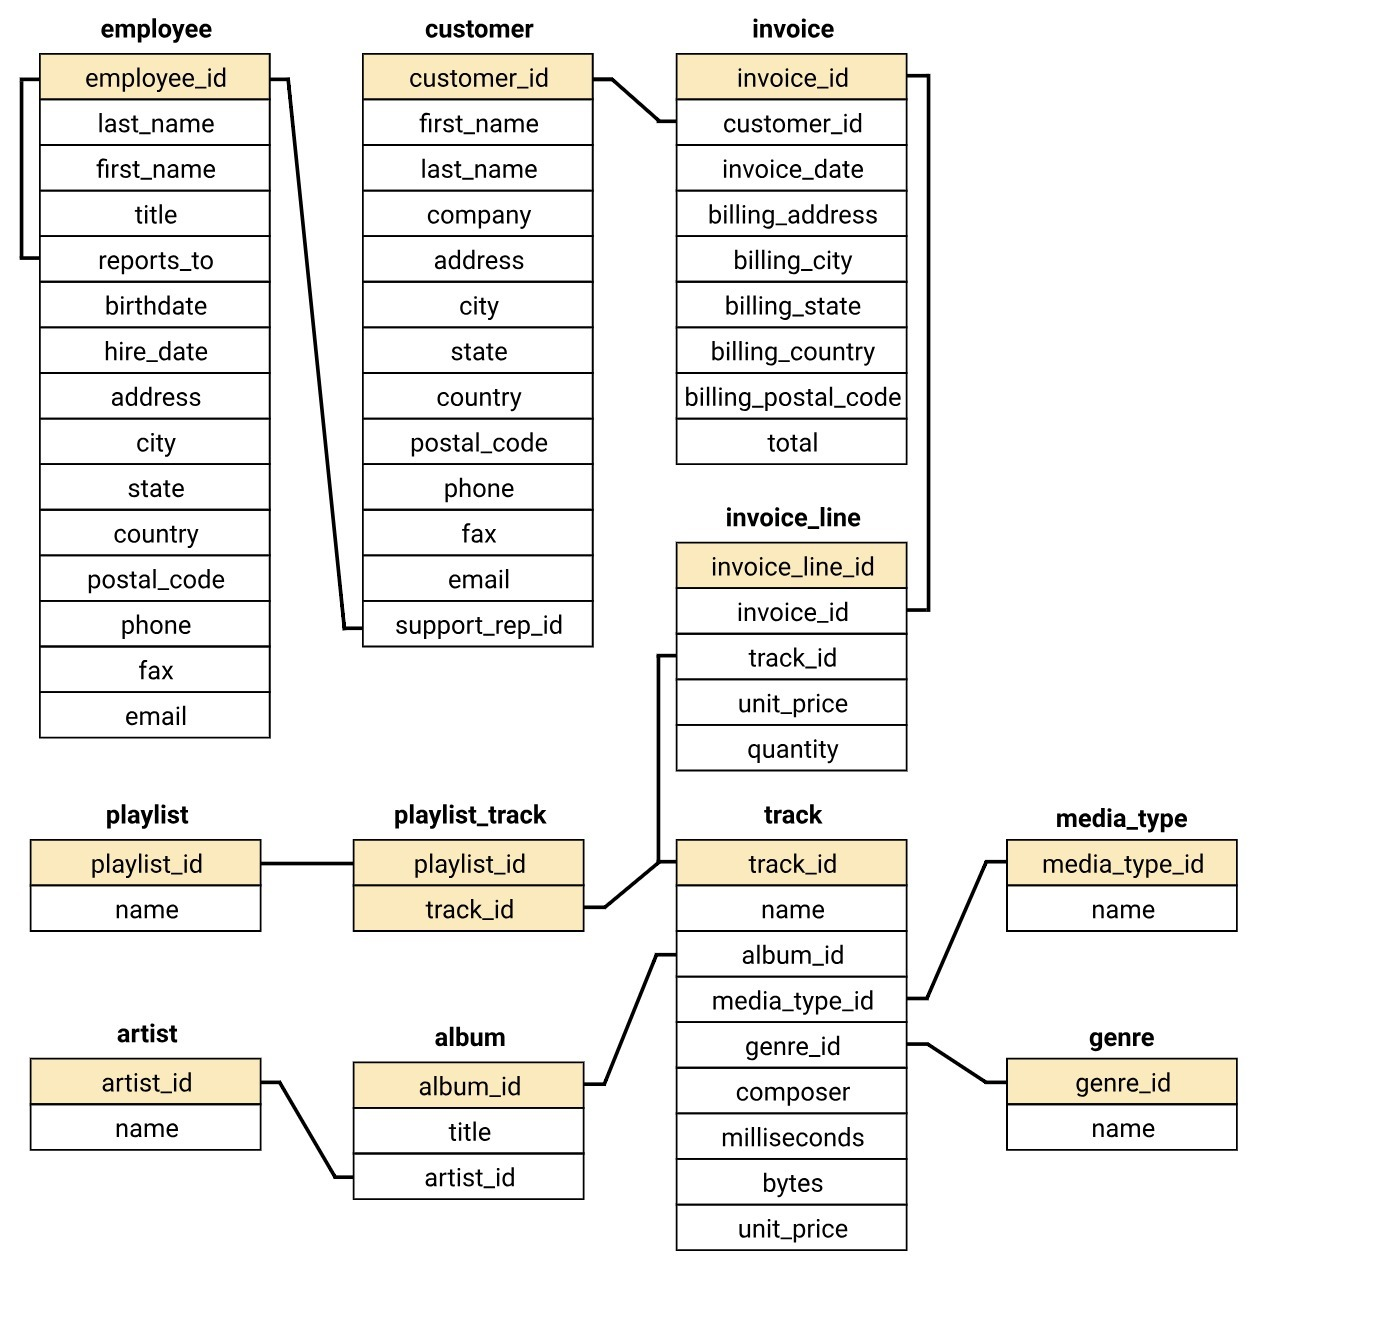

In [16]:
q = """ select * from invoice_line il inner join track t
        on t.track_id = il.track_id
        inner join media_type m 
        on m.media_type_id = t.media_type_id"""
query(q)

,invoice_line_id,invoice_id,track_id,unit_price,quantity,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price,media_type_id,name
0,1,1,1158,0.99,1,1158,Right Next Door to Hell,91,2,1,None,182321,3175950,0.99,2,Protected AAC audio file
1,2,1,1159,0.99,1,1159,Dust N' Bones,91,2,1,None,298374,5053742,0.99,2,Protected AAC audio file
2,3,1,1160,0.99,1,1160,Live and Let Die,91,2,1,None,184016,3203390,0.99,2,Protected AAC audio file
3,4,1,1161,0.99,1,1161,Don't Cry (Original),91,2,1,None,284744,4833259,0.99,2,Protected AAC audio file
4,5,1,1162,0.99,1,1162,Perfect Crime,91,2,1,None,143637,2550030,0.99,2,Protected AAC audio file
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4752,4753,614,2659,0.99,1,2659,Every Breath You Take,215,1,1,G M Sumner,254615,8364520,0.99,1,MPEG audio file
4753,4754,614,2660,0.99,1,2660,King Of Pain,215,1,1,G M Sumner,300512,9880303,0.99,1,MPEG audio file
4754,4755,614,2661,0.99,1,2661,Wrapped Around Your Finger,215,1,1,G M Sumner,315454,10361490,0.99,1,MPEG audio file
4755,4756,614,2662,0.99,1,2662,Don't Stand So Close to Me '86,215,1,1,G M Sumner,293590,9636683,0.99,1,MPEG audio file


In [21]:
q = """ select a.name Artist_Name, al.title Album_Title from artist a inner join album al
        on a.artist_id = al.artist_id
        """
query(q)

,Artist_Name,Album_Title
0,AC/DC,For Those About To Rock We Salute You
1,Accept,Balls to the Wall
2,Accept,Restless and Wild
3,AC/DC,Let There Be Rock
4,Aerosmith,Big Ones
...,...,...
342,Eugene Ormandy,Respighi:Pines of Rome
343,Emerson String Quartet,Schubert: The Late String Quartets & String Qu...
344,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...",Monteverdi: L'Orfeo
345,Nash Ensemble,Mozart: Chamber Music


In [29]:
q = """ select e1.first_name || " " || e1.last_name Employee_Name,
        e1.title Employee_Title,e2.first_name || " " || e2.last_name Supervisors_Name
        from employee e1
            left join employee e2
            on e1.reports_to = e2.employee_id"""
query(q)

,Employee_Name,Employee_Title,Supervisors_Name
0,Andrew Adams,General Manager,None
1,Nancy Edwards,Sales Manager,Andrew Adams
2,Jane Peacock,Sales Support Agent,Nancy Edwards
3,Margaret Park,Sales Support Agent,Nancy Edwards
4,Steve Johnson,Sales Support Agent,Nancy Edwards
5,Michael Mitchell,IT Manager,Andrew Adams
6,Robert King,IT Staff,Michael Mitchell
7,Laura Callahan,IT Staff,Michael Mitchell


In [ ]:
q = """ select e1.first_name || " " || e1.last_name Employee_Name,
        e1.title Employee_Title,e2.first_name || " " || e2.last_name Supervisors_Name
        from customer c
            left join invoice inv
            on c.customer_id = inv.customer_id"""
query(q)